In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv('sp500_stocks.csv', index_col='Date', parse_dates=True)
df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2010-01-04,MMM,40.835045,69.414719,69.774246,69.122070,69.473244,3640265.0
2010-01-05,MMM,40.579273,68.979935,69.590302,68.311035,69.230766,3405012.0
2010-01-06,MMM,41.154755,69.958191,70.735786,69.824417,70.133781,6301126.0
2010-01-07,MMM,41.184277,70.008362,70.033447,68.662209,69.665550,5346240.0
2010-01-08,MMM,41.474468,70.501671,70.501671,69.648827,69.974915,4073337.0
...,...,...,...,...,...,...,...
2024-04-01,ZTS,167.020004,167.020004,169.490005,166.119995,168.990005,1896500.0
2024-04-02,ZTS,165.009995,165.009995,166.169998,163.639999,165.669998,2391500.0
2024-04-03,ZTS,162.970001,162.970001,166.259995,162.639999,165.000000,2481200.0


In [2]:
Appl_df = df[df['Symbol'] == 'AAPL']
Appl_df = Appl_df.asfreq('d')
Appl_df = Appl_df.fillna(method='ffill')
Appl_df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2010-01-04,AAPL,6.470740,7.643214,7.660714,7.585000,7.622500,493729600.0
2010-01-05,AAPL,6.481928,7.656429,7.699643,7.616071,7.664286,601904800.0
2010-01-06,AAPL,6.378825,7.534643,7.686786,7.526786,7.656429,552160000.0
2010-01-07,AAPL,6.367033,7.520714,7.571429,7.466071,7.562500,477131200.0
2010-01-08,AAPL,6.409362,7.570714,7.571429,7.466429,7.510714,447610800.0
...,...,...,...,...,...,...,...
2024-04-01,AAPL,170.029999,170.029999,171.250000,169.479996,171.190002,46240500.0
2024-04-02,AAPL,168.839996,168.839996,169.339996,168.229996,169.080002,49329500.0
2024-04-03,AAPL,169.649994,169.649994,170.679993,168.580002,168.789993,47691700.0


In [3]:
Appl_df = Appl_df[Appl_df.index >= '2020-01-01']
Appl_df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-01,AAPL,71.429672,73.412498,73.419998,72.379997,72.482498,100805600.0
2020-01-02,AAPL,73.059418,75.087502,75.150002,73.797501,74.059998,135480400.0
2020-01-03,AAPL,72.349113,74.357498,75.144997,74.125000,74.287498,146322800.0
2020-01-04,AAPL,72.349113,74.357498,75.144997,74.125000,74.287498,146322800.0
2020-01-05,AAPL,72.349113,74.357498,75.144997,74.125000,74.287498,146322800.0
...,...,...,...,...,...,...,...
2024-04-01,AAPL,170.029999,170.029999,171.250000,169.479996,171.190002,46240500.0
2024-04-02,AAPL,168.839996,168.839996,169.339996,168.229996,169.080002,49329500.0
2024-04-03,AAPL,169.649994,169.649994,170.679993,168.580002,168.789993,47691700.0


In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def stationarity(col):
    res = adfuller(col.dropna())
    print("Test Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

Test Statistic: -1.9342547977201894
P-Value: 0.3161220646778129
Non-Stationary


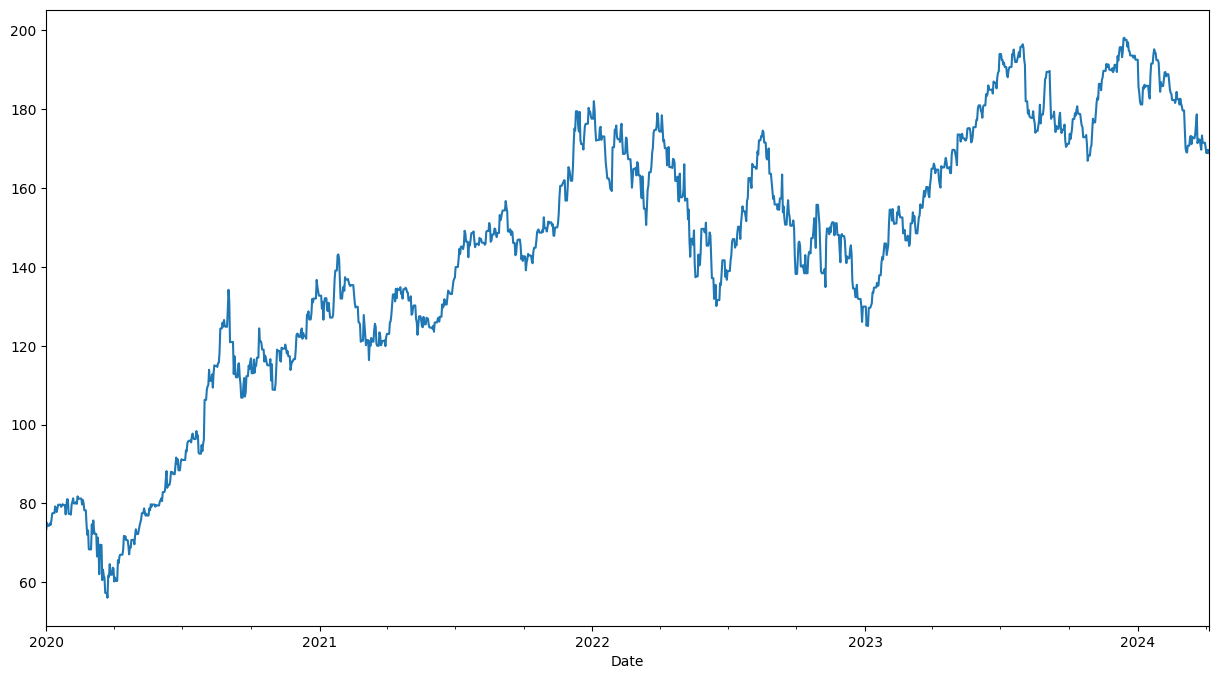

In [5]:
Appl_df['Close'].plot(figsize=(15,8))

stationarity(Appl_df['Close'])

Test Statistic: -41.146383319982014
P-Value: 0.0
Stationary


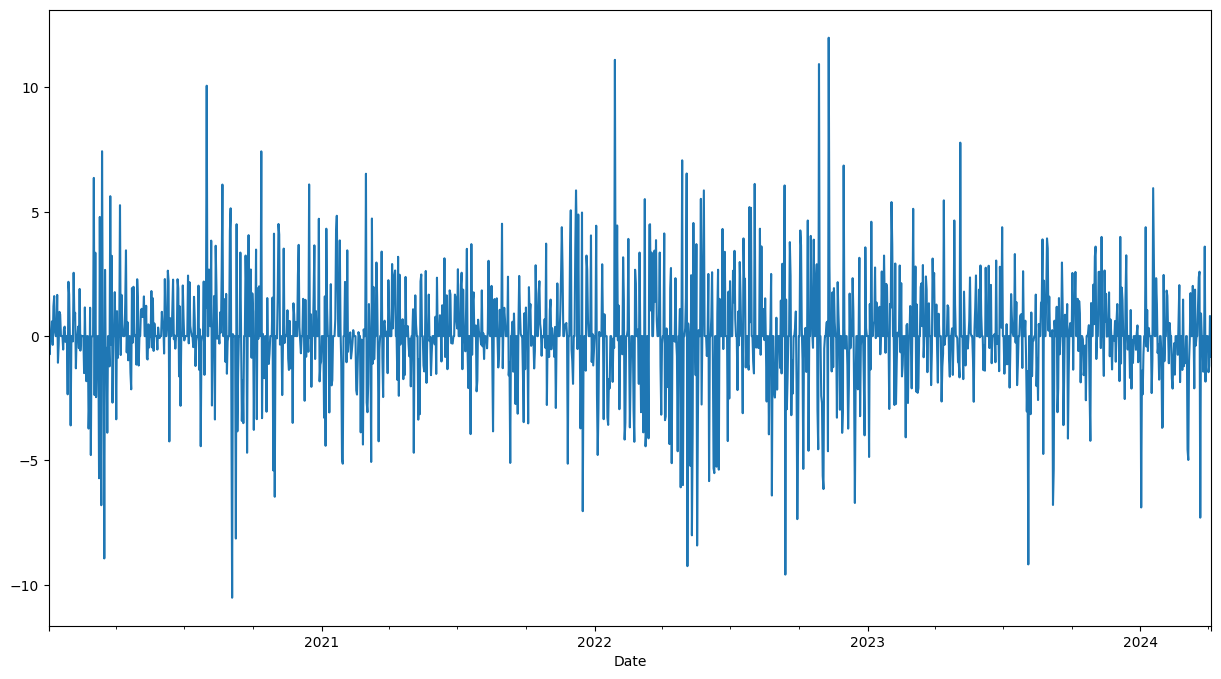

In [6]:
diff_1_close = Appl_df['Close'].diff().dropna()
diff_1_close.plot(figsize=(15,8))

stationarity(diff_1_close)

In [7]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs

d_val = ndiffs(Appl_df['Close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


In [8]:
#splitting the data to train and test sets based on Ntest value
#last 30 days
Ntest = 60
train = Appl_df.iloc[:-Ntest]
test = Appl_df.iloc[-Ntest:]
train_idx = Appl_df.index <= train.index[-1]
test_idx = Appl_df.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['Close'],
                      d = d_val,
                      start_p = 0,
                      max_p = 10,
                      start_q = 0,
                      max_q = 10,
                      stepwise=False,
                      max_order=20,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=6603.221, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=6602.168, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=6603.903, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=6605.866, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=6607.610, Time=0.20 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=6609.019, Time=0.29 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=6610.192, Time=0.29 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=6610.769, Time=0.37 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=6612.291, Time=0.43 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=6614.013, Time=0.53 sec
 ARIMA(0,1,10)(0,0,0)[1] intercept   : AIC=6613.036, Time=0.67 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=6602.256, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=6603.935, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=6605.930, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=6607.901, Time=0.17 sec
 ARIMA(1,

In [9]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (6, 1, 10),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [10]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
def plot_result(model, data, col_name, Ntest):
    
    params = model.get_params()
    d = params['order'][1]
    
    #In sample data prediction
    train_pred = model.predict_in_sample(start=d, end=-1)
    #out of sample prediction
    test_pred, conf = model.predict(n_periods=Ntest, return_conf_int=True)
    
    #plotting real values, fitted values and prediction values
    fig, ax= plt.subplots(figsize=(15,8))
    ax.plot(data[col_name].index, data[col_name], label='Actual Values')
    ax.plot(train.index[d:], train_pred, color='green', label='Fitted Values')
    ax.plot(test.index, test_pred, label='Forecast Values')
    ax.fill_between(test.index, conf[:,0], conf[:,1], color='red', alpha=0.3)
    ax.legend()
    
    #evaluating the model using RMSE and MAE metrics
    y_true = test[col_name].values
    rmse = np.sqrt(mean_squared_error(y_true,test_pred))
    mae = mean_absolute_error(y_true,test_pred)

    return rmse, mae

Mean Squared Error: 

 218.80097613976722
Mean Absolute Error:  12.841685885996036


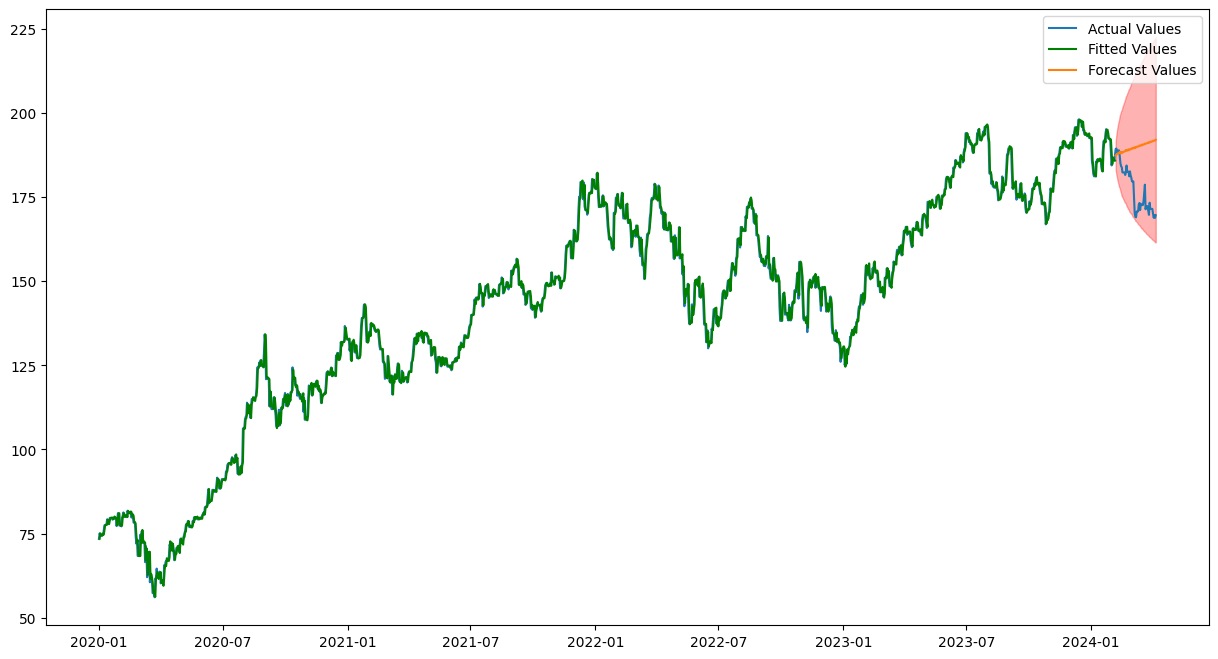

In [11]:
rmse , mae = plot_result(model, Appl_df, 'Close', Ntest=60)
print('Mean Squared Error: ', rmse**2)
print('Mean Absolute Error: ', mae)

In [12]:
Appl_df['log Close'] = np.log(Appl_df['Close'])
Appl_df

C:\Users\ibrah\AppData\Local\Temp\ipykernel_42708\1483754707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog_df['log Close'] = np.log(goog_df['Close'])


,Symbol,Adj Close,Close,High,Low,Open,Volume,log Close
Date,,,,,,,,
2020-01-01,AAPL,71.429672,73.412498,73.419998,72.379997,72.482498,100805600.0,4.296094
2020-01-02,AAPL,73.059418,75.087502,75.150002,73.797501,74.059998,135480400.0,4.318654
2020-01-03,AAPL,72.349113,74.357498,75.144997,74.125000,74.287498,146322800.0,4.308885
2020-01-04,AAPL,72.349113,74.357498,75.144997,74.125000,74.287498,146322800.0,4.308885
2020-01-05,AAPL,72.349113,74.357498,75.144997,74.125000,74.287498,146322800.0,4.308885
...,...,...,...,...,...,...,...,...
2024-04-01,AAPL,170.029999,170.029999,171.250000,169.479996,171.190002,46240500.0,5.135975
2024-04-02,AAPL,168.839996,168.839996,169.339996,168.229996,169.080002,49329500.0,5.128951
2024-04-03,AAPL,169.649994,169.649994,170.679993,168.580002,168.789993,47691700.0,5.133737


Test Statistic: -1.9860233246926158
P-Value: 0.29273480801822815
Non-Stationary


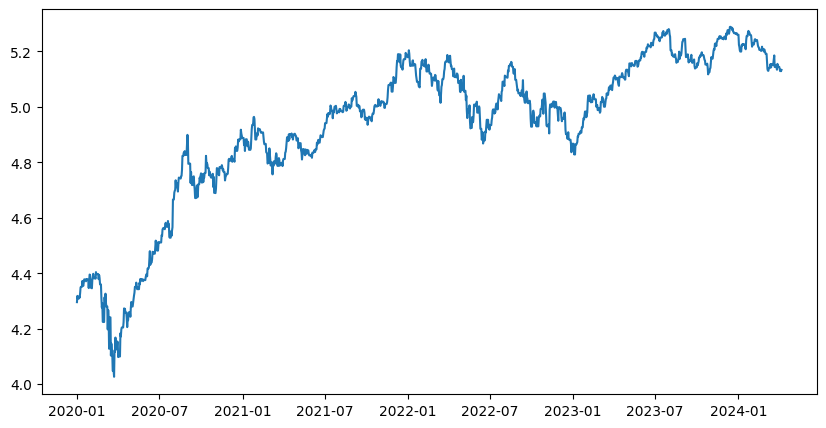

In [13]:
log_close = Appl_df['log Close'].dropna()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(log_close)

stationarity(log_close)

<Axes: xlabel='Date'>

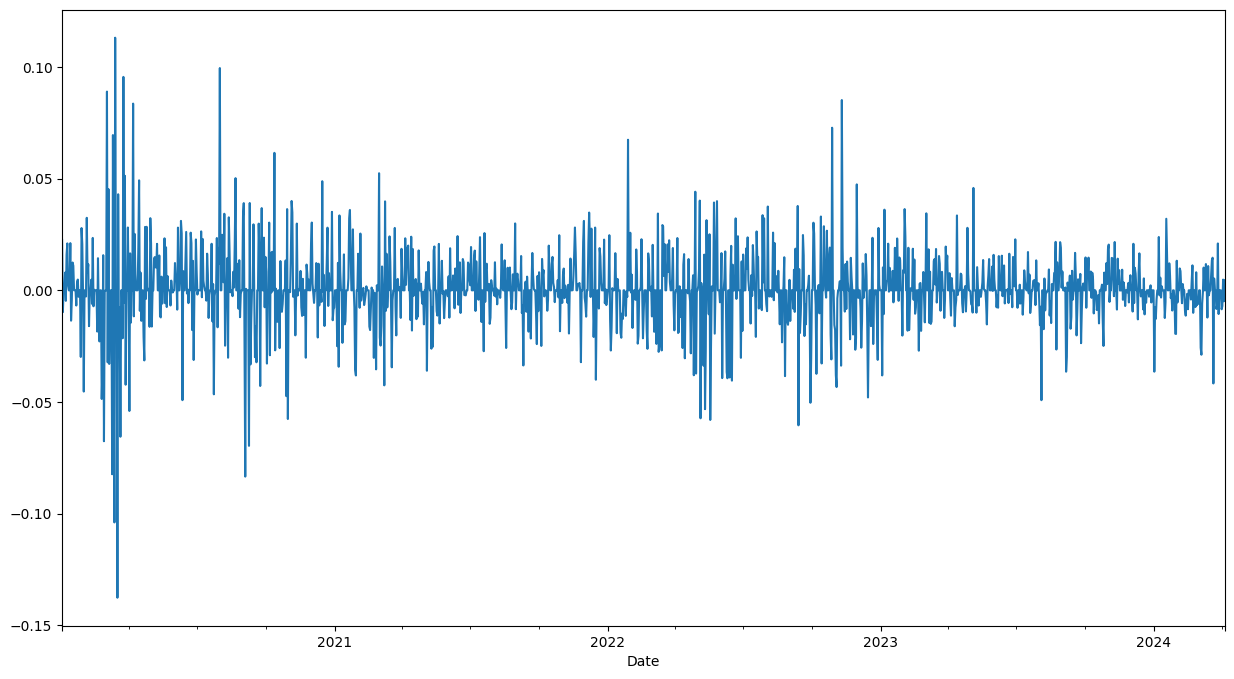

In [14]:
diff_1_logclose = Appl_df['log Close'].diff().dropna()
diff_1_logclose.plot(figsize=(15,8))

In [15]:
d_val = ndiffs(Appl_df['log Close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


In [16]:
#splitting the data to train and test sets based on Ntest value
#last 30 days
Ntest = 60
train = Appl_df.iloc[:-Ntest]
test = Appl_df.iloc[-Ntest:]
train_idx = Appl_df.index <= train.index[-1]
test_idx = Appl_df.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['log Close'],
                      d = d_val,
                      start_p = 0,
                      max_p = 10,
                      start_q = 0,
                      max_q = 10,
                      stepwise=False,
                      max_order=20,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-7867.132, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-7882.881, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-7880.943, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=-7879.092, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-7877.116, Time=0.19 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=-7876.292, Time=0.85 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=-7874.736, Time=0.95 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=-7875.125, Time=1.12 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=-7875.235, Time=2.72 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=-7873.269, Time=2.57 sec
 ARIMA(0,1,10)(0,0,0)[1] intercept   : AIC=-7877.170, Time=2.98 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=-7882.944, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=-7880.960, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=-7878.943, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=-7877.214, Time=0.3

In [17]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (8, 1, 10),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

Mean Squared Error: 

 0.00794817031005601
Mean Absolute Error:  0.07715675006526863


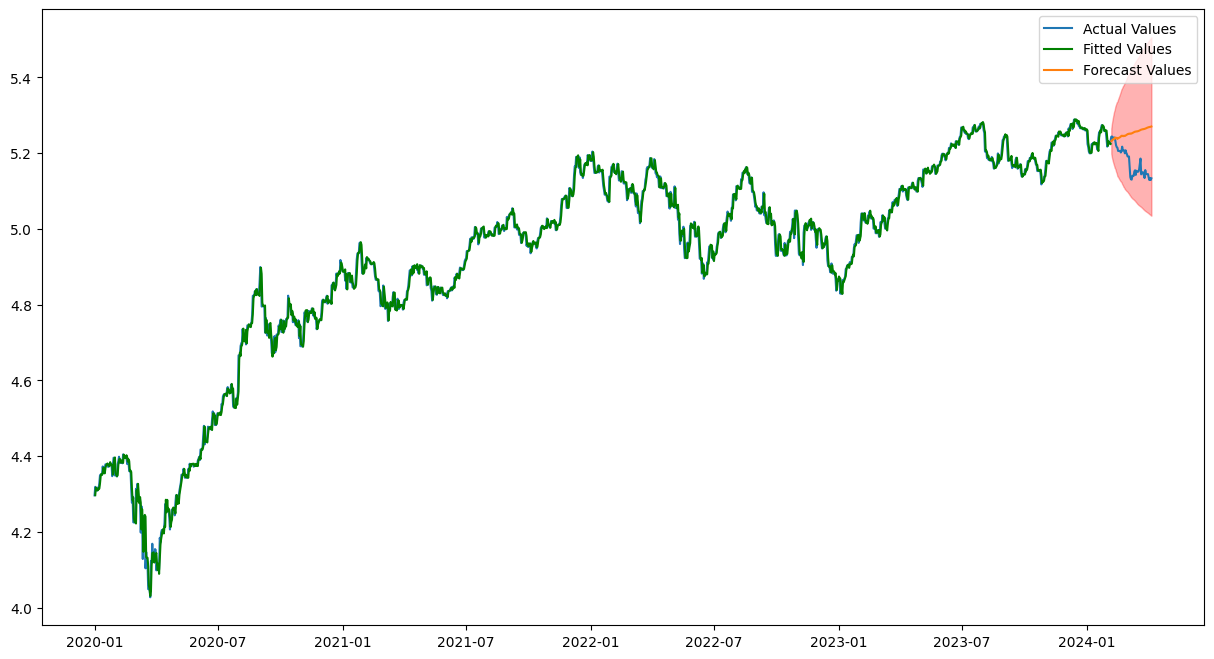

In [18]:

rmse, mae = plot_result(model, Appl_df, 'log Close', Ntest=60)
print('Mean Squared Error: ', rmse**2)
print('Mean Absolute Error: ', mae)